In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Model/GlobalLandTemperaturesByCity.csv',index_col = "dt", parse_dates = True)

In [4]:
df.head(10)

,AverageTemperature,AverageTemperatureUncertainty,City,Country
dt,,,,
1796-01-01,24.317,2.190,Colombo,Sri Lanka
1796-02-01,23.923,1.484,Colombo,Sri Lanka
1796-03-01,24.407,2.309,Colombo,Sri Lanka
1796-04-01,27.171,1.650,Colombo,Sri Lanka
1796-05-01,29.050,1.290,Colombo,Sri Lanka
1796-06-01,28.539,3.125,Colombo,Sri Lanka
1796-07-01,26.857,2.249,Colombo,Sri Lanka
1796-08-01,26.887,2.950,Colombo,Sri Lanka
1796-09-01,27.123,3.379,Colombo,Sri Lanka


In [5]:


type(df)



pandas.core.frame.DataFrame

In [6]:


df.describe()



,AverageTemperature,AverageTemperatureUncertainty
count,2508.000000,2508.000000
mean,26.631452,0.940125
std,1.608891,0.756954
min,21.010000,0.134000
25%,25.505000,0.380000
50%,26.865500,0.619500
75%,27.772750,1.388000
max,30.682000,5.807000


In [7]:
df_srilanka = df.drop('AverageTemperatureUncertainty', axis=1)
df_srilanka = df_srilanka.drop('Country',axis=1)

In [8]:
df_srilanka

,AverageTemperature,City
dt,,
1796-01-01,24.317,Colombo
1796-02-01,23.923,Colombo
1796-03-01,24.407,Colombo
1796-04-01,27.171,Colombo
1796-05-01,29.050,Colombo
...,...,...
2013-05-01,29.718,Colombo
2013-06-01,27.686,Colombo
2013-07-01,26.519,Colombo


In [9]:
df_srilanka = df_srilanka.drop('City',axis=1)

In [10]:
df_srilanka

,AverageTemperature
dt,
1796-01-01,24.317
1796-02-01,23.923
1796-03-01,24.407
1796-04-01,27.171
1796-05-01,29.050
...,...
2013-05-01,29.718
2013-06-01,27.686
2013-07-01,26.519


In [12]:
# Testing whether there are null values
df_srilanka[df_srilanka.isnull()]

,AverageTemperature
dt,
1796-01-01,NaN
1796-02-01,NaN
1796-03-01,NaN
1796-04-01,NaN
1796-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [13]:
len(df_srilanka[df_srilanka.isnull()])

2613

In [14]:
df_srilanka = df_srilanka.sort_index()

In [15]:
df_srilanka.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=2613, freq=None)

In [16]:
df_srilanka.AverageTemperature.fillna(method='pad', inplace=True)

In [17]:
df_srilanka[df_srilanka.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [18]:
df_srilanka.describe()

,AverageTemperature
count,2613.00000
mean,26.60608
std,1.59454
min,21.01000
25%,25.48600
50%,26.78700
75%,27.72500
max,30.68200


In [19]:
df_srilanka['Ticks'] = range(0,len(df_srilanka.index.values))

In [20]:
df_srilanka.head(10)

,AverageTemperature,Ticks
dt,,
1796-01-01,24.317,0
1796-02-01,23.923,1
1796-03-01,24.407,2
1796-04-01,27.171,3
1796-05-01,29.050,4
1796-06-01,28.539,5
1796-07-01,26.857,6
1796-08-01,26.887,7
1796-09-01,27.123,8


In [21]:
df_srilanka.tail(10)

,AverageTemperature,Ticks
dt,,
2012-12-01,26.828,2603
2013-01-01,24.187,2604
2013-02-01,25.005,2605
2013-03-01,26.301,2606
2013-04-01,27.335,2607
2013-05-01,29.718,2608
2013-06-01,27.686,2609
2013-07-01,26.519,2610
2013-08-01,26.953,2611


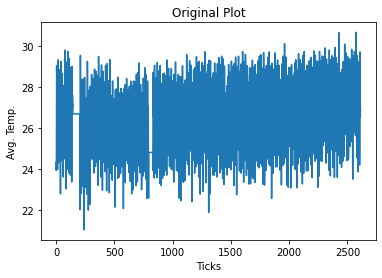

In [22]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_srilanka);

In [23]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
stationarity_check(df_srilanka.AverageTemperature)

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.550471552156974, 0.00015922403226506854, 27, 2585, {'1%': -3.4328822265006687, '5%': -2.862658740388024, '10%': -2.5673655460943023}, 4861.732645713535)
df_output: 
 Test Statistic                   -4.550472
p-value                           0.000159
#Lags Used                       27.000000
Number of Observations Used    2585.000000
dtype: float64
Test Statistic                   -4.550472
p-value                           0.000159
#Lags Used                       27.000000
Number of Observations Used    2585.000000
Critical Value (1%)              -3.432882
Critical Value (5%)              -2.862659
Critical Value (10%)             -2.567366
dtype: float64


In [25]:


from statsmodels.graphics.tsaplots import plot_pacf,plot_acf



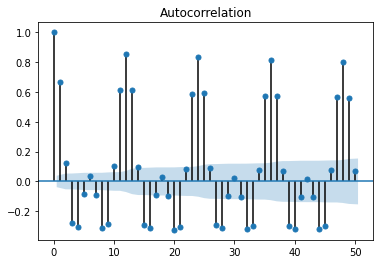

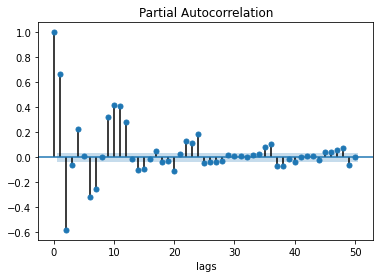

In [26]:


plot_acf(df_srilanka.AverageTemperature, lags=50)
plot_pacf(df_srilanka.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()



In [27]:


from statsmodels.tsa.arima_model import ARMA



In [28]:
import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_srilanka.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 0) - AIC:9856.745846341442
ARMA(0, 1) - AIC:8167.577595062026
ARMA(1, 0) - AIC:8317.20228492028


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 1) - AIC:7724.133923761604


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 2) - AIC:7438.560417923752


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 3) - AIC:7525.879324836904


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 0) - AIC:7248.489263886476


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 1) - AIC:7245.060324974729


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 2) - AIC:6975.52122013054


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 3) - AIC:6826.845337260947


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 0) - AIC:7240.767381847674


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 1) - AIC:7155.301597245485


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: Hessia

ARMA(3, 2) - AIC:6476.283421652841
ARMA(3, 3) - AIC:6383.981345400611


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


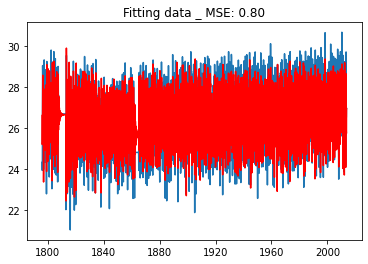

In [29]:
model = ARMA(df_srilanka.AverageTemperature, order=(2,3))  
results_MA = model.fit()  
plt.plot(df_srilanka.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_srilanka.AverageTemperature)**2).mean()))
plt.show()

In [36]:
predictions = results_MA.predict('2013-08-01', '2014-08-01').rename('Forward Predictions')
predictions2 = results_MA.predict('2012-08-01', '2013-08-01').rename('Backward Predictions')

In [37]:


predictions




2013-08-01    25.730911
2013-09-01    26.934926
2013-10-01    27.558825
2013-11-01    27.696934
2013-12-01    26.819631
2014-01-01    25.855471
2014-02-01    25.704691
2014-03-01    26.405231
2014-04-01    27.204972
2014-05-01    27.353819
2014-06-01    26.795407
2014-07-01    26.132827
2014-08-01    25.990261
Freq: MS, Name: Forward Predictions, dtype: float64

In [33]:
predictions2

2012-08-01    26.270894
2012-09-01    27.036211
2012-10-01    27.786284
2012-11-01    28.462352
2012-12-01    26.395035
2013-01-01    25.822038
2013-02-01    24.071269
2013-03-01    26.419467
2013-04-01    27.602115
2013-05-01    27.881013
2013-06-01    28.646551
2013-07-01    25.868432
2013-08-01    25.730911
Freq: MS, Name: Forward Predictions, dtype: float64

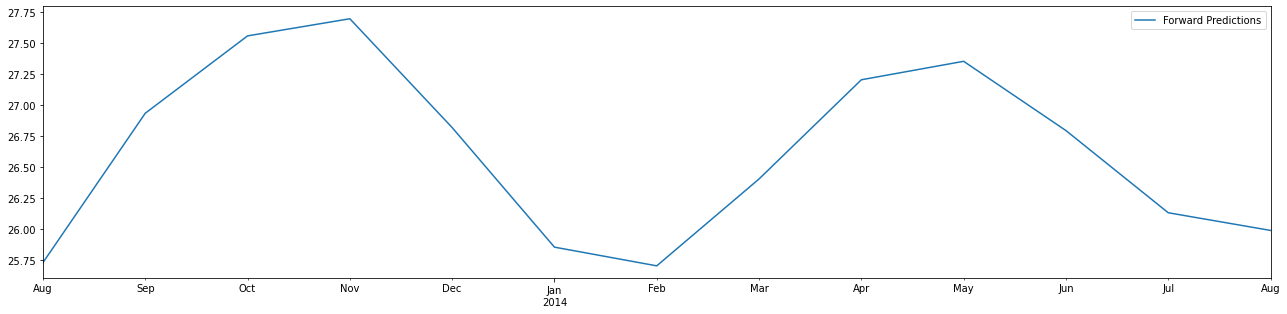

In [38]:
predictions.plot(figsize=(22,5),legend=True)

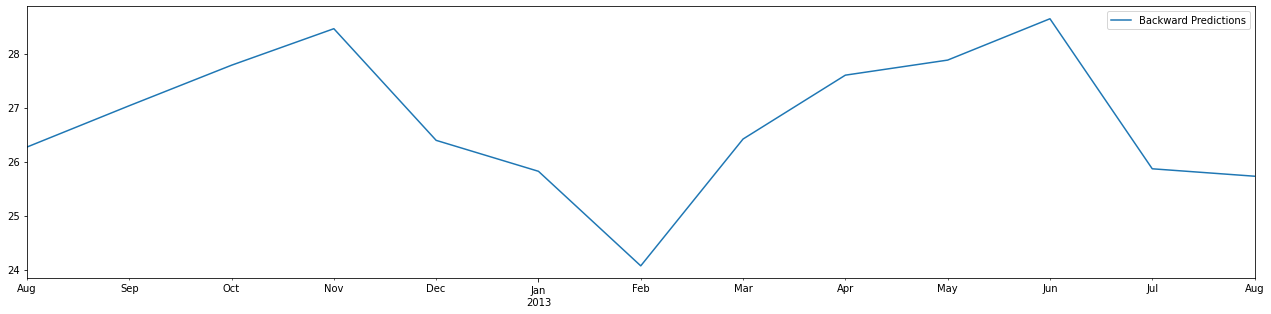

In [39]:
predictions2.plot(figsize=(22,5),legend=True)

In [ ]:
from joblib import dump, load
dump(results_MA, 'model2.joblib') 

['model2.joblib']

In [ ]:
clf = load('/content/drive/MyDrive/Colab Notebooks/model2.joblib') 

In [ ]:
clf